In [2]:
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
import pydot
import os

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from IPython.display import display, HTML
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# 1. Data loading and preprocessing using the Z-score normalization 

In [3]:
dataB = pd.read_csv('DataDNA.csv', sep = ',', header= None)
df2 = pd.DataFrame(dataB)
print(df2.shape)
df2.head(10)

(2200, 58)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,1,2,1,3,4,2,1,2,2,2,1,1,2,3,1,4,2,2,1,4,2,2,1,4,2,2,1,2,1,1,2,2,1,4,2,3,3,4,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,2,2,1,2,4,4,3,2,1,2,1,3,3,1,2,3,3,4,2,1,3,3,1,1,3,1,4,2,2,4,2,1,1,1,3,3,3,3,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,4,2,2,1,3,4,2,2,2,1,1,1,1,1,3,1,4,3,1,1,3,4,3,3,4,2,1,1,2,4,4,1,2,1,1,1,4,1,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,2,3,4,2,2,3,3,3,3,4,3,4,2,3,3,4,4,1,2,2,1,1,4,3,1,4,4,4,4,4,1,1,4,1,1,4,2,2,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,1,3,4,4,4,3,1,3,1,4,4,4,3,4,4,4,3,1,2,2,1,1,4,1,1,3,1,4,4,2,3,3,1,1,1,3,2,4,3,1,3,2,1,4,2,1,1,-1
5,3,2,3,1,2,3,4,3,1,4,3,4,3,3,1,1,3,1,4,2,2,1,3,1,4,4,2,1,3,2,4,2,3,2,1,3,3,3,3,3,1,2,2,1,3,3,1,1,2,2,2,3,4,2,2,2,2,-1
6,4,2,1,4,2,4,4,4,2,3,3,4,3,3,2,3,3,3,4,2,3,3,4,2,3,4,3,4,2,3,4,2,2,4,3,4,4,3,1,4,3,3,4,3,1,4,1,4,4,3,3,4,2,2,1,2,4,1
7,3,3,4,3,1,3,4,3,4,1,4,4,3,1,1,4,2,4,3,1,3,1,1,2,1,1,1,4,2,1,3,2,3,1,1,2,1,2,3,3,4,1,4,2,4,1,4,2,4,2,2,1,1,4,3,3,1,1
8,1,3,4,3,3,1,1,4,2,1,1,4,4,4,4,3,4,2,4,1,1,4,4,2,3,4,2,1,3,3,3,1,1,2,1,2,2,1,1,1,3,1,3,4,3,4,1,2,2,1,3,2,2,2,2,1,1,1
9,1,3,1,1,3,1,1,2,1,1,1,3,3,4,3,3,4,1,4,2,3,1,2,1,4,2,2,2,3,3,4,4,1,1,1,4,1,3,2,2,3,4,2,2,4,2,2,1,2,4,2,2,2,1,1,3,1,1


In [4]:
print(df2.isnull().sum().sum())
# df2.iloc[:,:-1].head()
print(df2.shape)
df2.head()

0
(2200, 58)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,1,2,1,3,4,2,1,2,2,2,1,1,2,3,1,4,2,2,1,4,2,2,1,4,2,2,1,2,1,1,2,2,1,4,2,3,3,4,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,2,2,1,2,4,4,3,2,1,2,1,3,3,1,2,3,3,4,2,1,3,3,1,1,3,1,4,2,2,4,2,1,1,1,3,3,3,3,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,4,2,2,1,3,4,2,2,2,1,1,1,1,1,3,1,4,3,1,1,3,4,3,3,4,2,1,1,2,4,4,1,2,1,1,1,4,1,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,2,3,4,2,2,3,3,3,3,4,3,4,2,3,3,4,4,1,2,2,1,1,4,3,1,4,4,4,4,4,1,1,4,1,1,4,2,2,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,1,3,4,4,4,3,1,3,1,4,4,4,3,4,4,4,3,1,2,2,1,1,4,1,1,3,1,4,4,2,3,3,1,1,1,3,2,4,3,1,3,2,1,4,2,1,1,-1


In [5]:
df2[57].value_counts()

 1    1137
-1    1063
Name: 57, dtype: int64

In [6]:
# df2[57] = df2[57].map({1: 1, -1: 0})

In [7]:
df2[57].head()

0    1
1    1
2    1
3   -1
4   -1
Name: 57, dtype: int64

In [8]:
# # Z-score normalized values
normalized_df = df2.iloc[:,:-1]
std_scale = preprocessing.StandardScaler().fit(normalized_df)
df_std = std_scale.transform(normalized_df)
df_zscore = pd.DataFrame(df_std)
df_zscore.columns =  normalized_df.columns
df_zscore.head()

/home/calkulas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/calkulas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-1.352898,-0.487479,-1.372441,-0.470994,-1.431156,-0.448281,0.405564,0.415676,0.396645,0.392611,-1.454242,-0.500168,-1.369434,0.381451,1.253160,-0.579766,-1.471189,-0.599369,-0.583351,-0.598913,-1.437523,-1.477642,-0.611451,0.332324,-1.495711,1.418861,-0.570943,0.015762,-1.448819,1.821169,-0.776737,-0.237862,-1.131068,1.535688,-0.569710,-0.376354,-1.395430,-0.483853,-1.401924,-1.399702,-0.496609,-0.455196,-1.402111,1.391803,-0.432450,0.472744,0.497988,1.424712,0.453914,-0.464630,0.513026,1.383572,-0.452656,-0.400135,-0.458416,-0.417566,-1.392249
1,0.459203,0.433082,1.360021,-0.470994,-1.431156,-0.448281,-0.495689,1.322008,0.396645,-0.509943,-0.530114,-0.500168,-1.369434,-0.549950,1.253160,1.232002,0.325434,-0.599369,-1.475822,-0.598913,-1.437523,0.346607,0.307396,-1.488629,-0.600319,0.496979,0.392304,1.749605,-0.318134,-1.360333,0.082831,0.675396,-1.131068,-1.391967,0.324910,-1.292259,1.360356,-0.483853,-0.477671,1.376149,-0.496609,-1.391112,-1.402111,-1.357643,0.493928,0.472744,0.497988,0.490475,-1.356803,1.404083,0.513026,1.383572,1.424521,1.435731,-1.374415,0.497419,1.369651
2,1.365253,-1.408039,1.360021,1.317075,1.342890,1.371309,-1.396943,-1.396986,-0.491065,-1.412496,1.318143,-0.500168,-0.476237,-1.481351,0.343575,1.232002,-0.572878,-0.599369,-0.583351,-1.505108,-1.437523,-1.477642,-1.530297,-1.488629,0.295072,-1.346787,1.355552,0.882684,-1.448819,-1.360333,0.082831,1.588655,0.627483,0.559803,1.219529,-0.376354,-1.395430,-1.404680,-0.477671,1.376149,1.367795,-1.391112,-0.485426,-1.357643,-1.358828,-1.361537,1.414020,-1.378000,-1.356803,-0.464630,-1.316240,-1.376046,1.424521,-0.400135,-0.458416,1.412405,1.369651
3,-1.352898,1.353642,-1.372441,-1.365028,0.418208,0.461514,1.306817,1.322008,0.396645,1.295164,-0.530114,0.400298,1.310158,-0.549950,-0.566010,0.326118,0.325434,0.311904,0.309119,1.213478,0.364500,1.258732,-0.611451,0.332324,0.295072,1.418861,1.355552,-0.851159,-0.318134,-0.299832,-1.636305,-1.151121,1.506759,0.559803,-1.464329,1.455456,1.360356,1.357802,1.370835,1.376149,-1.428812,-1.391112,1.347943,-1.357643,-1.358828,1.389885,-0.418044,-0.443763,-1.356803,0.469726,0.513026,1.383572,-1.391244,0.517798,0.457583,1.412405,-0.471615
4,0.459203,1.353642,1.360021,0.423041,-1.431156,-1.358075,1.306817,1.322008,1.284354,-1.412496,-1.454242,0.400298,1.310158,1.312852,1.253160,0.326118,-1.471189,0.311904,-1.475822,1.213478,1.265512,1.258732,0.307396,1.242800,1.190464,1.418861,0.392304,-0.851159,-0.318134,-0.299832,-1.636305,-1.151121,1.506759,-1.391967,-1.464329,0.539551,-1.395430,1.357802,1.370835,-0.474418,0.435593,0.480721,-1.402111,-1.357643,-1.358828,0.472744,-0.418044,1.424712,0.453914,-1.398986,0.513026,-0.456173,-1.391244,1.435731,-0.458416,-1.332552,-1.392249


# 2.Parameter Selection: 

# a) K-NN

For k= 1, Accuracies: [-0.30097087 -0.30519481 -0.30844156 -0.27922078 -0.27687296]
For k= 3, Accuracies: [-0.22258181 -0.19444444 -0.20310245 -0.19083694 -0.19471589]
For k= 5, Accuracies: [-0.18640777 -0.17012987 -0.17948052 -0.1838961  -0.1904886 ]
For k= 7, Accuracies: [-0.17845585 -0.17373443 -0.18274583 -0.17691492 -0.18586718]
For k= 9, Accuracies: [-0.17711455 -0.1675485  -0.17805034 -0.17756934 -0.18156593]
For k= 11, Accuracies: [-0.17288507 -0.16818718 -0.17792744 -0.17599549 -0.18424099]
For k= 13, Accuracies: [-0.17424025 -0.16541151 -0.17707293 -0.173538   -0.18229478]
For k= 15, Accuracies: [-0.17386552 -0.16686869 -0.17647908 -0.17252525 -0.18136808]
For k= 17, Accuracies: [-0.1758323  -0.16625848 -0.17807711 -0.17179706 -0.18041545]
For k= 19, Accuracies: [-0.1769357  -0.16627694 -0.17812174 -0.17415548 -0.18152616]
For k= 21, Accuracies: [-0.17748718 -0.16687281 -0.17966104 -0.1724534  -0.18297178]
For k= 23, Accuracies: [-0.18156625 -0.1666278  -0.18145607 -0.1712125

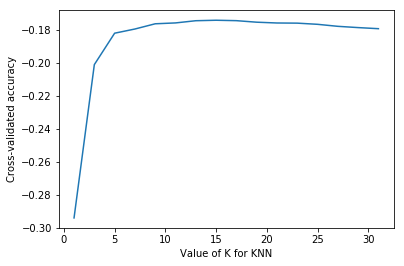

In [12]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# 5-fold cross-validation with k = [1, 3, 5, 7, 31] for KNN (the n_neighbors parameter)
k = list(range(1,32,2))
k_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='brier_score_loss')
    k_scores.append(scores.mean())
    print("For k= {}, Accuracies: {}".format(i, scores))
    

print('\n')
print('Mean of accuracy scores:', k_scores)
print('\n')
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

plt.plot(k, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
# plt.title('')
plt.savefig(os.path.join('2-2-a-kNN.png'), dpi=300, format='png', bbox_inches='tight')



#ref: https://www.ritchieng.com/machine-learning-cross-validation/

# b) SVM (RBF Kernel)

In [ ]:
model = SVC()
param_grid = {'C': [0.1, 0.5, 1, 2, 5,10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,refit=True, scoring='roc_auc')
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
#SVM GATHER DATA
rbf_svc = SVC(kernel='rbf', gamma=0.01, C=10,probability=True).fit(X_train,y_train)

#PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
predictedprobSVC = rbf_svc.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, 1.0]
#plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.savefig(os.path.join('2-2-b-svm.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#ref :https://medium.com/datadriveninvestor/computing-an-roc-graph-with-python-a3aa20b9a3fb

# 3. Training classifiers and reporting the results:

# a) Classifying the test set using k-NN, SVM, Random Forests, and Neural Network

In [78]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

Knn and SVM with chosen parameters from part 2

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)

In [80]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

In [82]:
print("Classification Report for k-NN:")
print("Accuracy is ", accuracy_score(y_test,knn_pred)*100)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

print("Classification Report for SVM:")
print("Accuracy is ", accuracy_score(y_test,svm_pred)*100)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Classification Report for k-NN:
Accuracy is  75.75757575757575
[[313  24]
 [136 187]]


              precision    recall  f1-score   support

          -1       0.70      0.93      0.80       337
           1       0.89      0.58      0.70       323

   micro avg       0.76      0.76      0.76       660
   macro avg       0.79      0.75      0.75       660
weighted avg       0.79      0.76      0.75       660

Classification Report for SVM:
Accuracy is  90.75757575757576
[[310  27]
 [ 34 289]]
              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       337
           1       0.91      0.89      0.90       323

   micro avg       0.91      0.91      0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660



Random Forest and Neural Network classifiers with default parameters

In [83]:
rfc = RandomForestClassifier(random_state=42)
nn_mlp = MLPClassifier(random_state=42)

In [84]:
rfc.fit(X_train, y_train)
nn_mlp.fit(X_train, y_train)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
rfc_pred = rfc.predict(X_test)
nn_mlp_pred = nn_mlp.predict(X_test)

In [86]:
print("Classification Report for Random Forests: ")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))


Classification Report for Random Forests: 
Accuracy is  94.6969696969697
[[329   8]
 [ 27 296]]


              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       337
           1       0.97      0.92      0.94       323

   micro avg       0.95      0.95      0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660

Classification Report for Neural Network:
Accuracy is  90.45454545454545
[[308  29]
 [ 34 289]]
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       337
           1       0.91      0.89      0.90       323

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



# b) Exploring parameters for Random Forest and Neural Network

Random Forests

In [87]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9463348981635447

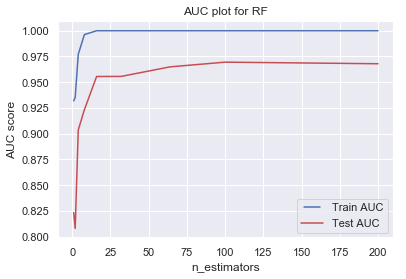

In [88]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

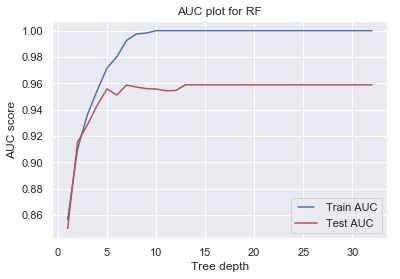

In [89]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_estimators=25, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(Treedepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [90]:
rfc_tuned = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=13)

In [91]:
rfc_tuned = rfc_tuned.fit(X_train, y_train)
rfc_tuned_pred = rfc_tuned.predict(X_test)

In [92]:
print("Results from the default parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tuned parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_tuned_pred)*100)
print(confusion_matrix(y_test,rfc_tuned_pred))
print(classification_report(y_test,rfc_tuned_pred))

Results from the default parameters for Random forests:
Accuracy is  94.6969696969697
[[329   8]
 [ 27 296]]


              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       337
           1       0.97      0.92      0.94       323

   micro avg       0.95      0.95      0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



Results from the tuned parameters for Random forests:
Accuracy is  96.96969696969697
[[330   7]
 [ 13 310]]
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       337
           1       0.98      0.96      0.97       323

   micro avg       0.97      0.97      0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



### Neural Network

In [93]:
nn_mlp = MLPClassifier(random_state=42)
nn_mlp.fit(X_train, y_train)
nn_mlp_pred = nn_mlp.predict(X_test)

In [94]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(57,57,57), (57,57),(57,30,10)], # (57,57,30,20,5)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'random_state': [42],
    'batch_size': [70, 200]
}

In [95]:
nn_mlp_tuned = GridSearchCV(nn_mlp, parameter_space, n_jobs=-1, cv=5, refit=True)
nn_mlp_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [2000], 'hidden_layer_sizes': [(57, 57, 57), (57, 57), (57, 30, 10)], 'activation': ['tanh', 'relu', 'logistic'], 'solver': ['sgd', 'adam', 'lbfgs'], 'alpha': [0.0001, 0.05], 'random_state': [42], 'batch_size': [70, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
# Best parameter set
print('Best parameters found:\n', nn_mlp_tuned.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'batch_size': 70, 'hidden_layer_sizes': (57, 57), 'max_iter': 2000, 'random_state': 42, 'solver': 'adam'}


In [97]:
nn_mlp_tuned1 = MLPClassifier(activation = nn_mlp_tuned.best_params_['activation'],
                       alpha = nn_mlp_tuned.best_params_['alpha'], 
#                        learning_rate= nn_mlp_tuned.best_params_['learning_rate'], 
                       solver = nn_mlp_tuned.best_params_['solver'], 
                       random_state = nn_mlp_tuned.best_params_['random_state'], 
                       hidden_layer_sizes = nn_mlp_tuned.best_params_['hidden_layer_sizes'],
                       batch_size = nn_mlp_tuned.best_params_['batch_size'],
                       max_iter = nn_mlp_tuned.best_params_['max_iter'],
#                        early_stopping = True,
                             )
print(nn_mlp_tuned1)

nn_mlp_tuned1.fit(X_train, y_train)
y_true, y_pred = y_test, nn_mlp_tuned1.predict(X_test)

print("Results from the default parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))
print("\n")
print("Results from the tunned parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

MLPClassifier(activation='relu', alpha=0.05, batch_size=70, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(57, 57), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Results from the default parameters for the neural network:
Accuracy is  90.45454545454545
[[308  29]
 [ 34 289]]
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       337
           1       0.91      0.89      0.90       323

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



Results from the tunned parameters for the neural network:
Accuracy is  91.81818181818183
[[314  23]
 [ 31 

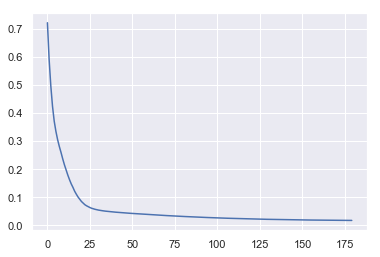

In [98]:
plt.plot(nn_mlp_tuned1.loss_curve_)

# C) Varying the split of the training-test set

In [99]:
from sklearn.model_selection import KFold
import time

def cross_validate_model(X, y, clf, n_splits):
    #define 10-fold cross validation test harness
    kfold = KFold(n_splits=n_splits, shuffle=True)
    results = []
    count = 1
    for _ in range(20):
        for train, test in kfold.split(X, y):
            count += 1
            
            
            t0 = time.time()
            model = clf.fit(X[train], y[train])
            t1 = time.time()
            y_pred = model.predict(X[test])
            t2 = time.time()

            classification_time = round(t2-t1, 3) # Classification time rounded to 3 decimal in seconds
            training_time = round(t1-t0, 3) # Classification time rounded to 3 decimal in seconds
            precision,recall,fscore,support = score( y[test],y_pred,average='macro')
            accuracy = accuracy_score(y[test],y_pred)
            results.append([accuracy, precision, recall, fscore, support, training_time, classification_time, n_splits])
    
    result_data = pd.DataFrame(results)
    result_data.columns = ["accuracy", "precision", "recall", "fscore", "support", "training_time", "classification_time", "num_folds"]
    
    return result_data

### KNN Run Kfold for 4,5,6,7 folds 20 times each
#1

In [100]:
np.random.seed(40)
knn = KNeighborsClassifier(n_neighbors=15)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, knn, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [101]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
data.groupby(['num_folds']).agg(f)

accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.745864  0.023114  0.808710  0.013763  0.753512  0.018404   
5          0.748864  0.024771  0.811162  0.017760  0.756567  0.019308   
6          0.749138  0.022607  0.810598  0.014659  0.756590  0.019838   
7          0.749615  0.024383  0.811470  0.017244  0.757170  0.019821   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.735450  0.024561      0.003663  0.000655            0.078737   
5          0.738834  0.025422      0.003870  0.000646            0.065730   
6          0.738984  0.024429      0.004100  0.000640            0.056383   
7          0.739602  0.025480      0.004179  0.000732            0.050071   

                     
                std  
num_folds            
4          0.005182  
5          0.005216  
6          0.003016  
7          0.002184

### SVM Run Kfold for 4,5,6,7 folds 20 times each
#2

In [102]:
np.random.seed(40)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, svm, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [103]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
data.groupby(['num_folds']).agg(f)

accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.904977  0.009886  0.905068  0.009814  0.905459  0.010072   
5          0.906591  0.013718  0.906716  0.013808  0.907089  0.013772   
6          0.908980  0.013963  0.909205  0.013704  0.909547  0.013829   
7          0.908477  0.015045  0.908656  0.014887  0.909214  0.015080   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.904802  0.009929      0.136550  0.007715            0.029375   
5          0.906390  0.013799      0.154630  0.008387            0.024990   
6          0.908782  0.013958      0.166458  0.008687            0.021308   
7          0.908318  0.015047      0.176264  0.010253            0.018586   

                     
                std  
num_folds            
4          0.001435  
5          0.001667  
6          0.001454  
7          0.001541

### Random Forest Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS** #3

In [104]:
np.random.seed(40)
rfc = RandomForestClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, rfc, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [105]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

Third classifier: Results from random forests(default parameters)


accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.931705  0.011215  0.933171  0.010612  0.932839  0.011263   
5          0.935500  0.011552  0.936539  0.011329  0.936623  0.011228   
6          0.933363  0.014262  0.934647  0.013498  0.934581  0.013813   
7          0.935523  0.015066  0.936697  0.014821  0.936593  0.014565   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.931581  0.011305      0.020400  0.006153            0.001738   
5          0.935387  0.011577      0.019870  0.001529            0.001550   
6          0.933234  0.014311      0.020475  0.001572            0.001467   
7          0.935404  0.015075      0.020900  0.001495            0.001421   

                     
                std  
num_folds            
4          0.000545  
5          0.000557  
6          0.000517  
7          0.000537

### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS** #4

In [106]:
np.random.seed(40)
nn_mlp = MLPClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [107]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

Third classifier: Results from random forests(default parameters)


accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.904023  0.011207  0.904137  0.011126  0.904522  0.011414   
5          0.904318  0.013531  0.904469  0.013608  0.904825  0.013506   
6          0.908957  0.014906  0.909144  0.014712  0.909591  0.014857   
7          0.908365  0.014705  0.908520  0.014453  0.909037  0.014826   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.903846  0.011265      1.019775  0.035731            0.000675   
5          0.904115  0.013595      1.052240  0.089332            0.000690   
6          0.908772  0.014893      1.225083  0.105306            0.000642   
7          0.908198  0.014704      1.099529  0.058040            0.000507   

                     
                std  
num_folds            
4          0.000471  
5          0.000563  
6          0.000994  
7          0.000530

### Random Forest Classifier Run Kfold for 4,5,6,7 folds 20 times each
**TUNED PARAMETERS** #5

In [108]:
np.random.seed(40)
rfc_tuned = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=13)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, rfc_tuned, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [109]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Fifth classifier: Random Forest (tuned paramters)")
data.groupby(['num_folds']).agg(f)

Fifth classifier: Random Forest (tuned paramters)


accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.965545  0.006271  0.965535  0.006281  0.965968  0.006104   
5          0.966136  0.008737  0.966057  0.008878  0.966612  0.008444   
6          0.966615  0.008104  0.966484  0.008228  0.967125  0.007939   
7          0.966773  0.009351  0.966706  0.009329  0.967227  0.009200   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.965475  0.006288      0.182337  0.005960            0.012375   
5          0.966059  0.008767      0.190760  0.005079            0.010990   
6          0.966539  0.008116      0.197417  0.007613            0.010150   
7          0.966699  0.009364      0.201936  0.006731            0.009707   

                     
                std  
num_folds            
4          0.001267  
5          0.001185  
6          0.001294  
7          0.001333

### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**Tuned PARAMETERS** #6

In [110]:
np.random.seed(40)
nn_mlp_tuned2 = MLPClassifier(activation = nn_mlp_tuned.best_params_['activation'],
                       alpha = nn_mlp_tuned.best_params_['alpha'], 
#                        learning_rate= nn_mlp_tuned.best_params_['learning_rate'], 
                       solver = nn_mlp_tuned.best_params_['solver'], 
                       random_state = nn_mlp_tuned.best_params_['random_state'], 
                       hidden_layer_sizes = nn_mlp_tuned.best_params_['hidden_layer_sizes'],
                       batch_size = nn_mlp_tuned.best_params_['batch_size'],
                       max_iter = nn_mlp_tuned.best_params_['max_iter'],
#                        early_stopping = True,
                             )
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp_tuned2, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [111]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Sixth classifier: Neural Network (tuned paramter)")
data.groupby(['num_folds']).agg(f)

Sixth classifier: Neural Network (tuned paramter)


accuracy           precision              recall            \
               mean       std      mean       std      mean       std   
num_folds                                                               
4          0.915114  0.008754  0.915302  0.008598  0.915638  0.008846   
5          0.918273  0.012544  0.918448  0.012669  0.918779  0.012448   
6          0.920320  0.013751  0.920475  0.013628  0.920848  0.013428   
7          0.919751  0.013632  0.919835  0.013544  0.920329  0.013639   

             fscore           training_time           classification_time  \
               mean       std          mean       std                mean   
num_folds                                                                   
4          0.914955  0.008798      2.323025  0.164931            0.000800   
5          0.918091  0.012619      2.863520  0.394073            0.000610   
6          0.920143  0.013758      2.935850  0.239638            0.000542   
7          0.919597  0.013616      2.773336  0.196689            0.000564   

                     
                std  
num_folds            
4          0.000403  
5          0.000510  
6          0.000517  
7          0.000526